# Classification Tree

-   Baskin Robbins nutritional information: http://www.baskinrobbins.ca/nutritional-information/
-   ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---


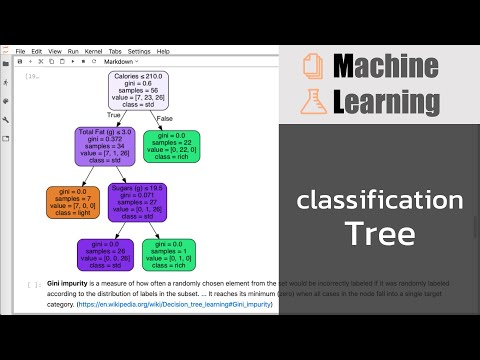

In [65]:
from IPython.display import YouTubeVideo

YouTubeVideo("CrlmjqHXhqI", width=720, height=405)



In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

In [67]:
print(f"pandas  version: {pd.__version__}")
print(f"numpy   version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")



pandas  version: 1.4.1
numpy   version: 1.21.5
seaborn version: 0.11.2


In [68]:
url = "https://github.com/prasertcbs/basic-dataset/raw/master/baskin_robbins_classifier.csv"
df = pd.read_csv(url)
df.head()


,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [70]:
df.columns


Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [71]:
cols = [
    "Calories",
    "Total Fat (g)",
    "Trans Fat (g)",
    "Carbohydrates (g)",
    "Sugars (g)",
    "Protein (g)",
]



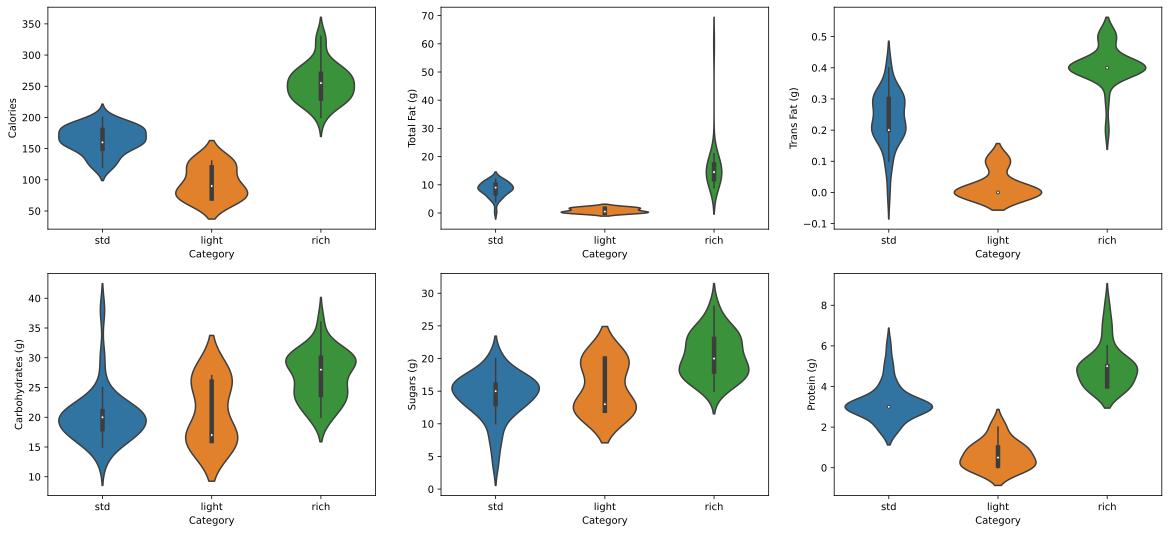

In [72]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x="Category", y=col, data=df, ax=ax[i])



---


## Draw Decision Tree


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_fscore_support,
    f1_score,
)



In [74]:
df.columns


Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [75]:
cols = [
    "Calories",
    "Total Fat (g)",
    "Trans Fat (g)",
    "Carbohydrates (g)",
    "Sugars (g)",
    "Protein (g)",
]



In [76]:
X = df[cols]  # features
y = df["Category"]  # label



In [77]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)



In [78]:
model = DecisionTreeClassifier(criterion="gini")  # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)


DecisionTreeClassifier()

In [79]:
X_train.columns


Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [80]:
model.feature_importances_


array([0.62367944, 0.31901352, 0.        , 0.        , 0.05730704,
       0.        ])

In [81]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs


Calories             0.623679
Total Fat (g)        0.319014
Sugars (g)           0.057307
Trans Fat (g)        0.000000
Carbohydrates (g)    0.000000
Protein (g)          0.000000
dtype: float64

In [82]:
y_train.value_counts()


std      26
rich     23
light     7
Name: Category, dtype: int64

### tree diagram (better way)

-   **install graphviz on Windows**

1. install graphviz: `pip install -U graphviz`
1. download graphviz: https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/
1. extract and copy to: `C:\Program Files (x86)\Graphviz\bin`
1. add `C:\Program Files (x86)\Graphviz\bin` to `PATH` enviroment variable


In [83]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [84]:
clf.__dict__


{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
        'Sugars (g)', 'Protein (g)'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array(['light', 'rich', 'std'], dtype=object),
 'n_classes_': 3,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x22be054f180>}

In [85]:
clf.__dict__["tree_"]



In [86]:
type(clf)


sklearn.tree._classes.DecisionTreeClassifier

In [87]:
clf.__dict__["classes_"]



array(['light', 'rich', 'std'], dtype=object)

In [88]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source


def view_tree(model, X, save_tree_img=False):
    estimators = clf
    dot_graph = export_graphviz(
        estimators,
        feature_names=X.columns,
        class_names=model.__dict__["classes_"],
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    #     with open(f'tree{tree_index}.dot') as f:
    #         dot_graph = f.read()
    g = Source(dot_graph)
    if save_tree_img:
        g.render(f"tree", format="png", view=False, cleanup=True)
    return g


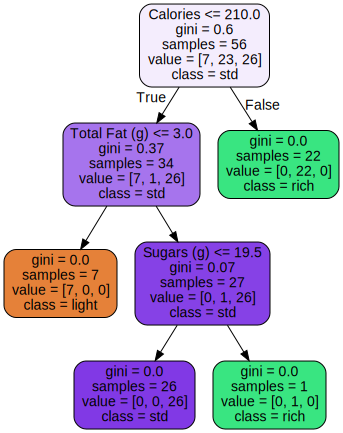

In [89]:
view_tree(clf, X_test, save_tree_img=False)


**Gini impurity** is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. ... It reaches its minimum (zero) when all cases in the node fall into a single target category. (https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

$$
{\displaystyle \operatorname {I} _{G}(p)=\sum _{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}{p_{i}}^{2}=1-\sum _{i=1}^{J}{p_{i}}^{2}}
$$

**gini value at the top level**

$$
gini=1-\left(\left(\frac{7}{56}\right)^2+\left(\frac{23}{56}\right)^2+\left(\frac{26}{56}\right)^2\right)=.6
$$


In [90]:
# from sklearn import tree
# tree.plot_tree(clf)


In [91]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm


array([[2, 0, 0],
       [0, 5, 0],
       [1, 1, 5]], dtype=int64)

In [92]:
print(classification_report(y, model.predict(X)))


              precision    recall  f1-score   support

       light       0.90      1.00      0.95         9
        rich       0.97      1.00      0.98        28
         std       1.00      0.94      0.97        33

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70



In [93]:
model.tree_.impurity  # gini



array([0.60012755, 0.37197232, 0.        , 0.07133059, 0.        ,
       0.        , 0.        ])

In [94]:
model.tree_.value


array([[[ 7., 23., 26.]],

       [[ 7.,  1., 26.]],

       [[ 7.,  0.,  0.]],

       [[ 0.,  1., 26.]],

       [[ 0.,  0., 26.]],

       [[ 0.,  1.,  0.]],

       [[ 0., 22.,  0.]]])

In [95]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D


In [96]:
# switch to interactive matplotlib
# %matplotlib qt
# %pylab qt

# switch back to inline mode
%matplotlib inline

## 3D scatter


Text(0.5, 0, 'Sugars (g)')

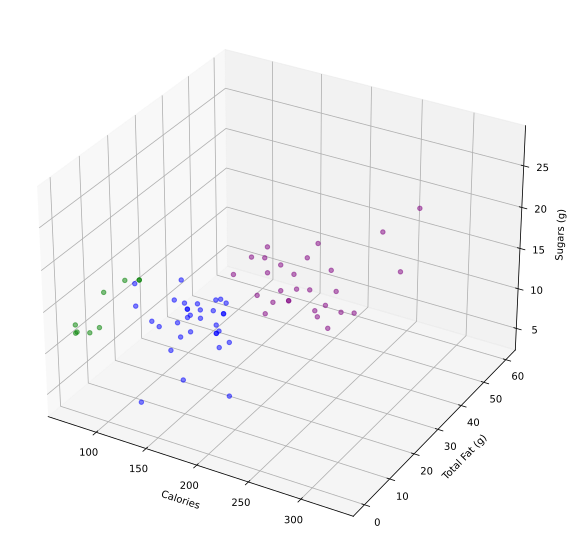

In [97]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
colors = y.map({"light": "green", "std": "blue", "rich": "purple"})
ax.scatter(X["Calories"], X["Total Fat (g)"], X["Sugars (g)"], alpha=0.5, c=colors)
ax.set_xlabel("Calories")
ax.set_ylabel("Total Fat (g)")
ax.set_zlabel("Sugars (g)")



---


In [98]:
predicted = model.predict(X_test)
predicted


array(['light', 'rich', 'std', 'rich', 'rich', 'std', 'std', 'rich',
       'rich', 'light', 'std', 'std', 'light', 'rich'], dtype=object)

In [99]:
pd.crosstab(y_test, predicted)


col_0,light,rich,std
Category,,,
light,2,0,0
rich,0,5,0
std,1,1,5


---
